# Data Set


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df=pd.read_csv('transactions.csv')
df.head(100)

,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,TRANSFER,19824.96,4537027967639631,187712.18,167887.22,4875702729424478,8.31,19833.27,1
1,0,PAYMENT,598.97,4296267625767470,8.92,8.92,25-0000401,0.00,0.00,0
2,0,PAYMENT,545.85,4178224023847746,93.60,-452.25,13-0001587,0.00,545.85,0
3,0,TRANSFER,19847.01,4178224023847746,-452.25,-20299.26,4096920916696293,4011.72,23858.74,1
4,0,PAYMENT,546.89,4779013371563747,159148.76,158601.88,75-0003564,0.00,546.89,0
...,...,...,...,...,...,...,...,...,...,...
95,0,TRANSFER,24741.79,4830126149028533,328713.03,303971.23,4647700553831963,33.64,24775.43,1
96,0,PAYMENT,546.46,4806126828359720,100761.41,100214.95,88-0004674,0.00,546.46,0
97,0,TRANSFER,16896.95,4806126828359720,100214.95,83318.00,4469177469806469,67.72,16964.67,0
98,0,PAYMENT,537.25,4621558916837501,96.37,96.37,13-0004154,0.00,0.00,0


In [3]:
# No of rows in Dataset
print(df.shape[0])

1720181


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720181 entries, 0 to 1720180
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   transactionType  object 
 2   amount           float64
 3   initiator        int64  
 4   oldBalInitiator  float64
 5   newBalInitiator  float64
 6   recipient        object 
 7   oldBalRecipient  float64
 8   newBalRecipient  float64
 9   isFraud          int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 131.2+ MB


In [5]:
df.describe()

,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06
mean,6.555529e+01,5.253868e+04,4.499952e+15,2.433758e+06,2.443880e+06,1.085083e+05,1.222772e+05,1.020346e-01
std,4.467368e+01,8.835650e+04,2.896351e+14,1.307615e+06,1.297181e+06,2.830138e+05,3.192277e+05,3.026939e-01
min,0.000000e+00,2.400000e-01,4.000062e+15,-1.999971e+05,-1.999971e+05,-1.983685e+05,-1.357280e+05,0.000000e+00
25%,2.300000e+01,6.064600e+02,4.248762e+15,1.577186e+06,1.600496e+06,1.606423e+04,2.496233e+04,0.000000e+00
50%,5.400000e+01,1.729825e+04,4.508521e+15,2.619827e+06,2.625680e+06,6.313018e+04,7.448161e+04,0.000000e+00
75%,1.060000e+02,7.116149e+04,4.750928e+15,3.361338e+06,3.361872e+06,1.373822e+05,1.431702e+05,0.000000e+00
max,1.430000e+02,2.142928e+06,4.999855e+15,1.224469e+07,1.224469e+07,1.188554e+07,1.206621e+07,1.000000e+00


# Exploratory Analysis

In [6]:
#check for  the Null values
print(df.isnull().sum())

step               0
transactionType    0
amount             0
initiator          0
oldBalInitiator    0
newBalInitiator    0
recipient          0
oldBalRecipient    0
newBalRecipient    0
isFraud            0
dtype: int64


In [7]:
df.columns

Index(['step', 'transactionType', 'amount', 'initiator', 'oldBalInitiator',
       'newBalInitiator', 'recipient', 'oldBalRecipient', 'newBalRecipient',
       'isFraud'],
      dtype='object')

In [8]:
# Remove the 'step' column
df = df.drop(columns=['step'])


#Removing "Initiator"
df = df.drop(columns=['initiator'])

#Removing "Initiator"
df = df.drop(columns=['recipient'])
df.head(10)



,transactionType,amount,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
0,TRANSFER,19824.96,187712.18,167887.22,8.31,19833.27,1
1,PAYMENT,598.97,8.92,8.92,0.00,0.00,0
2,PAYMENT,545.85,93.60,-452.25,0.00,545.85,0
3,TRANSFER,19847.01,-452.25,-20299.26,4011.72,23858.74,1
4,PAYMENT,546.89,159148.76,158601.88,0.00,546.89,0
5,TRANSFER,16973.75,158601.88,141628.12,54.33,17028.08,1
6,PAYMENT,659.02,261950.48,261291.46,0.00,659.02,0
7,TRANSFER,21103.99,261291.46,240187.47,19.63,21123.63,1
8,PAYMENT,648.89,4808.94,4160.05,0.00,648.89,0
9,TRANSFER,16908.07,4160.05,4160.05,66.12,66.12,1


In [9]:
from sklearn.preprocessing import LabelEncoder
# Convert 'transactionType' using label encoding
label_encoder = LabelEncoder()
df['transactionType'] = label_encoder.fit_transform(df['transactionType'])

# Display the mapping of transaction types
print("Transaction Type Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Display the first few rows to confirm
print(df.head())

Transaction Type Mapping:
{'DEBIT': np.int64(0), 'DEPOSIT': np.int64(1), 'PAYMENT': np.int64(2), 'TRANSFER': np.int64(3), 'WITHDRAWAL': np.int64(4)}
   transactionType    amount  oldBalInitiator  newBalInitiator  \
0                3  19824.96        187712.18        167887.22   
1                2    598.97             8.92             8.92   
2                2    545.85            93.60          -452.25   
3                3  19847.01          -452.25        -20299.26   
4                2    546.89        159148.76        158601.88   

   oldBalRecipient  newBalRecipient  isFraud  
0             8.31         19833.27        1  
1             0.00             0.00        0  
2             0.00           545.85        0  
3          4011.72         23858.74        1  
4             0.00           546.89        0  


In [10]:
df.head(10)

,transactionType,amount,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
0,3,19824.96,187712.18,167887.22,8.31,19833.27,1
1,2,598.97,8.92,8.92,0.00,0.00,0
2,2,545.85,93.60,-452.25,0.00,545.85,0
3,3,19847.01,-452.25,-20299.26,4011.72,23858.74,1
4,2,546.89,159148.76,158601.88,0.00,546.89,0
5,3,16973.75,158601.88,141628.12,54.33,17028.08,1
6,2,659.02,261950.48,261291.46,0.00,659.02,0
7,3,21103.99,261291.46,240187.47,19.63,21123.63,1
8,2,648.89,4808.94,4160.05,0.00,648.89,0
9,3,16908.07,4160.05,4160.05,66.12,66.12,1


In [11]:
#No of Rows in the Dataset after Preprocesing
print(df.shape[0])

1720181


# Pie Chart

Number of Fraud transactions: 175518
Number of Non-Fraud transactions: 1544663


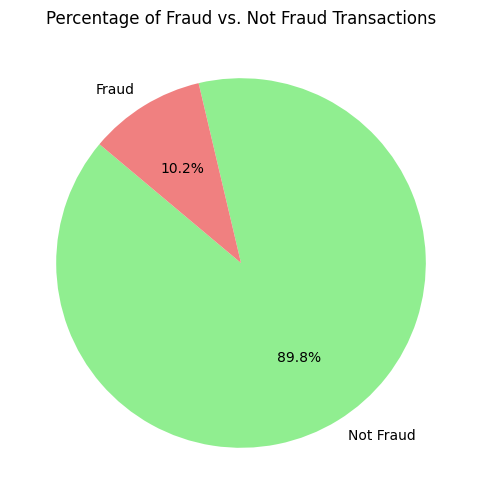

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each value in 'isFraud'
fraud_counts = df['isFraud'].value_counts()

# Print the number of fraud and non-fraud transactions
print(f"Number of Fraud transactions: {fraud_counts[1]}")
print(f"Number of Non-Fraud transactions: {fraud_counts[0]}")

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Percentage of Fraud vs. Not Fraud Transactions')
plt.show()

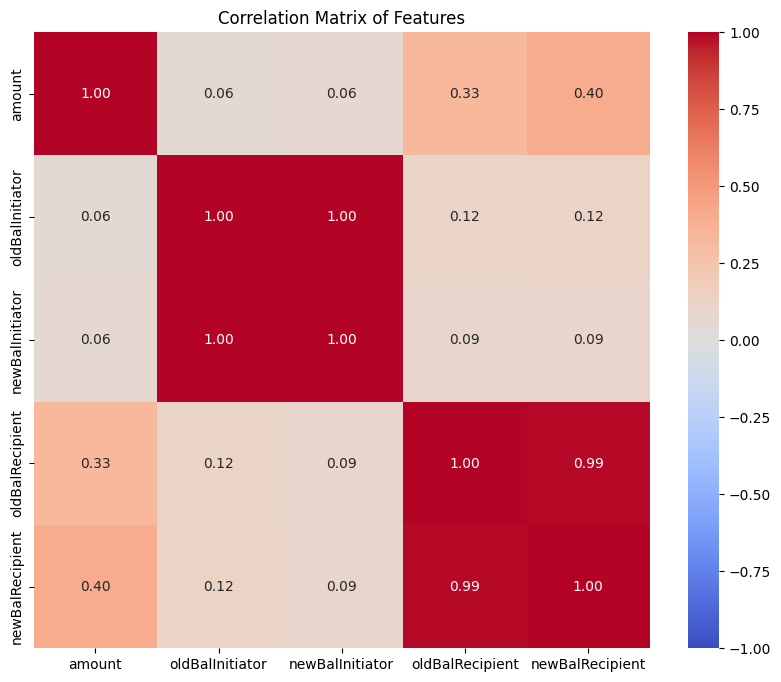

In [13]:
# Numerical features to consider for correlation
numerical_features = ['amount', 'oldBalInitiator', 'newBalInitiator', 'oldBalRecipient', 'newBalRecipient']

# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with a color bar
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt=".2f")

# Display the heatmap
plt.title("Correlation Matrix of Features")
plt.show()

# Dataset Splitting

In [14]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df[['transactionType', 'amount', 'oldBalInitiator', 'newBalInitiator', 'oldBalRecipient', 'newBalRecipient']]
y = df['isFraud']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the splits
print(f"Training data features shape: {X_train.shape}")
print(f"Test data features shape: {X_test.shape}")
print(f"Training data labels shape: {y_train.shape}")
print(f"Test data labels shape: {y_test.shape}")

Training data features shape: (1204126, 6)
Test data features shape: (516055, 6)
Training data labels shape: (1204126,)
Test data labels shape: (516055,)


C:\Users\mekal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.89


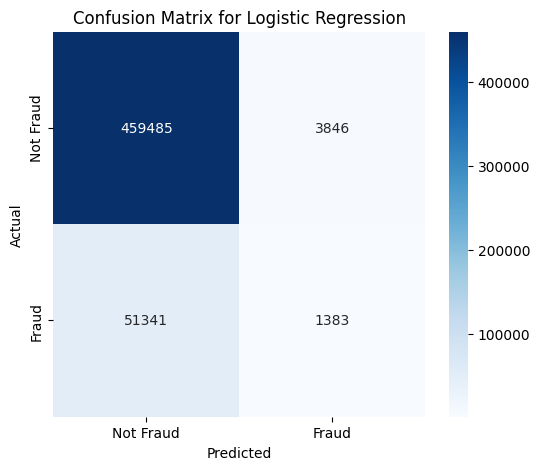

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [18]:
# ------------------- Gradient Boosting -------------------
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9026596002364089
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    463331
           1       0.71      0.08      0.14     52724

    accuracy                           0.90    516055
   macro avg       0.81      0.54      0.55    516055
weighted avg       0.89      0.90      0.87    516055



In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model (assuming X_train and y_train are already prepared)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 0.884475491953377
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94    463331
           1       0.38      0.21      0.27     52724

    accuracy                           0.88    516055
   macro avg       0.65      0.59      0.60    516055
weighted avg       0.86      0.88      0.87    516055

